### e-풀필먼트 과정

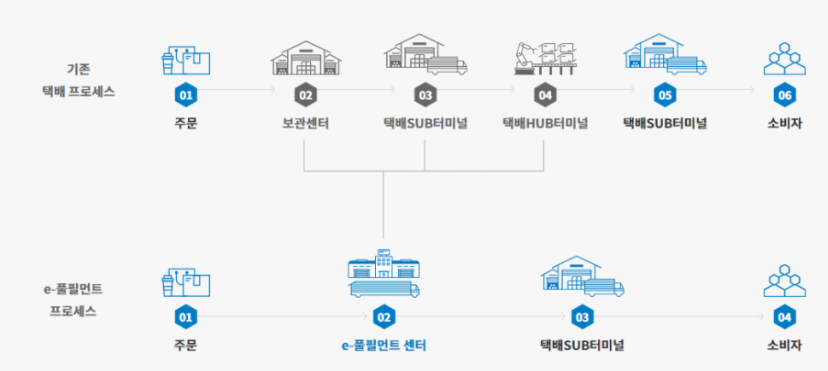

In [13]:
Image.open('D:\\NIA\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\e-풀필먼트 과정.PNG', mode = 'r')

##### 곤지암 e-풀필먼트 센터에 상품을 미리 입고해놓고, 주문이 들어오자마자 근처 '곤지암 메가허브'로 이동하여 배송을 진행

In [36]:
import numpy as np
import pandas as pd
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
import math
from datetime import datetime

# FC 주문 데이터

In [3]:
os.chdir('D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터')
#디렉토리 변경

file_list2 = os.listdir()
print(f'<현 경로 파일 리스트>\n\n {file_list2}')
print('---------------------------')
fc_list = [i for i in file_list2 if 'FC주문' in i] 
print(f'<FC 파일>\n\n {fc_list}')

<현 경로 파일 리스트>

 ['1-1. 이커머스 FC주문 데이터_3월.csv', '1-2. 이커머스 FC주문 데이터_4월.csv', '1-3. 이커머스 FC주문 데이터_5월.csv', '1-4. 이커머스 FC주문 데이터_6월.csv', 'cj_lgbm_4', 'df_total.csv', 'e-풀필먼트 과정.PNG', 'fc_all.csv', 'fc_all.zip', 'image.png', 'image2.png', 'report_data.zip', 'set_345.csv', 'set_6.csv', '고객사선택.csv', '모델결과_포함_데이터.zip', '코로나확진자수(21년03~06).csv', '통합데이터_주소전처리.csv', '형변환', '휴일 및 기념일 merge용 데이터.zip', '휴일 및 특별한 날 merge용 데이터.csv']
---------------------------
<FC 파일>

 ['1-1. 이커머스 FC주문 데이터_3월.csv', '1-2. 이커머스 FC주문 데이터_4월.csv', '1-3. 이커머스 FC주문 데이터_5월.csv', '1-4. 이커머스 FC주문 데이터_6월.csv']


In [4]:
fc_list_abspath = glob.glob(r'D:\NIA\선택과제\2021년_미래기술_챌린지_211002\1. 이커머스 FC주문 데이터\\*월.csv')
fc_list_abspath = fc_list_abspath[0:4]
fc_list_abspath

['D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\1-1. 이커머스 FC주문 데이터_3월.csv',
 'D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\1-2. 이커머스 FC주문 데이터_4월.csv',
 'D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\1-3. 이커머스 FC주문 데이터_5월.csv',
 'D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\1-4. 이커머스 FC주문 데이터_6월.csv']

### 데이터 병합

In [5]:
df_total = pd.DataFrame()

for file in fc_list_abspath: 
    print(file)
    df = pd.read_excel(file)
    df = df.reset_index(drop = True)
    #기존의 인덱스는 첫번째 열로 자동 삽입
    #drop = True를 추가해줌으로써 기존 인덱스를 버림
    df_total = df_total.append(df, ignore_index = True)

D:\NIA\선택과제\2021년_미래기술_챌린지_211002\1. 이커머스 FC주문 데이터\1-1. 이커머스 FC주문 데이터_3월.csv
D:\NIA\선택과제\2021년_미래기술_챌린지_211002\1. 이커머스 FC주문 데이터\1-2. 이커머스 FC주문 데이터_4월.csv
D:\NIA\선택과제\2021년_미래기술_챌린지_211002\1. 이커머스 FC주문 데이터\1-3. 이커머스 FC주문 데이터_5월.csv
D:\NIA\선택과제\2021년_미래기술_챌린지_211002\1. 이커머스 FC주문 데이터\1-4. 이커머스 FC주문 데이터_6월.csv


In [6]:
df_total.shape
df_total = df_total.fillna(np.nan)
df = df_total

In [7]:
df.head()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


### 변수명 변경

In [11]:
col=['창고코드','고객주문번호(key)','대한통운주문번호','주문유형','주문날짜시간','주문시간','고객사코드','주문금액','품목순번','품목코드','브랜드','품목수량','품목금액','수신여부','주문생성시간','택배구분','상품주문번호','중개업체주문번호','접수여부','배달예정점소코드','배달예정사원코드','배달터미널코드','배달터미널소분류','입력자ID','입력일자시간','입력시간','권역구분','분할여부','송화인주소1','송화인주소2','수화인주소1','수화인주소2']
df.columns=col
df.head()

,창고코드,고객주문번호(key),대한통운주문번호,주문유형,주문날짜시간,주문시간,고객사코드,주문금액,품목순번,품목코드,...,배달터미널소분류,입력자ID,입력일자시간,입력시간,권역구분,분할여부,송화인주소1,송화인주소2,수화인주소1,수화인주소2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


### 공휴일 맵핑

In [16]:
import requests, bs4
import pandas as pd

url = "https://www.timeanddate.com/holidays/south-korea/"
resp = requests.get(url)
websource = resp.text
bsobj = bs4.BeautifulSoup(websource, "html.parser")

# 1. 컬럼 헤더 찾기.
thead = bsobj.select_one("#holidays-table > thead")
thead

# 결과 : <thead><tr><th rowspan="2">Date</th><th rowspan="2"> </th><th rowspan="2">Name</th><th rowspan="2">Type</th></tr><tr></tr></thead>

iter_th = thead.find_all("th")
iter_th

# 결과 :
# [<th rowspan="2">Date</th>,
#  <th rowspan="2"> </th>,
#  <th rowspan="2">Name</th>,
#  <th rowspan="2">Type</th>]

hcontent=[]

for th in iter_th:
    hcontent.append(th.text)

hcontent

# 결과 : ['Date', '\xa0', 'Name', 'Type']

# 2. body 데이터 찾기.
tbody = bsobj.select_one("#holidays-table > tbody")
iter_tr = tbody.find_all("tr")

content=[]
allcontent=[]

#rows = iter_tr[0]

for rows in iter_tr:
    if rows.text=="":
        continue
    ths = rows.find_all("th")    # body 데이터 중 1월 1일 ~ 이 있는 1번째 컬럼. (th 태그로 구성)
    for th in ths:
        content.append(th.text)
    tds = rows.find_all("td")
    for td in tds:
        content.append(td.text)  # body 데이터 나머지 2~3번째 컬럼. (td 태그로 구성)
    allcontent.append(content)
    content=[]

    
    
# 3. 데이터프레임 만들기.
finalResult = pd.DataFrame(allcontent)
finalResult.columns = hcontent
finalResult

hol_finalResult = finalResult[finalResult['Type'].str.contains('holiday', case = False)]
spe_finalResult = finalResult[finalResult['Type'].str.contains('Observance',case = False)]
#case = False : 대소문자 구분 x


date_hol = '2021-' + hol_finalResult['Date'].str.replace('월 ','-').str.replace('일','')
date_hol = pd.to_datetime(date_hol)
date_hol = pd.DataFrame(date_hol)
date_hol['holidays'] = 1
date_hol = date_hol.set_index('Date')
date_hol


date_spe = '2021-' + spe_finalResult['Date'].str.replace('월 ','-').str.replace('일','')
date_spe = pd.to_datetime(date_spe)
date_spe = pd.DataFrame(date_spe)
date_spe['special'] = 1
date_spe = date_spe.set_index('Date')
date_spe

#2021년 요일 데이터프레임 생성
date_2021 = pd.date_range('2021-01-01', '2021-12-31', freq = 'D').to_series().dt.dayofweek
date_2021 = pd.DataFrame(date_2021)
date_2021.rename(columns = {date_2021.columns[0]:'weekdays'}, inplace = True)
date_2021

#인덱스를 기준으로 inner join
hol = pd.concat([date_hol,date_2021],axis=1, join='inner')  

#index라는 컬럼명을 Date로 변경
hol = hol.reset_index()
hol.rename(columns = {'index' : 'Date'}, inplace = True)
hol['Date'] = pd.to_datetime(hol['Date'])
print(hol)

spe = pd.concat([date_spe,date_2021],axis=1, join='inner')  

#index라는 컬럼명을 Date로 변경
spe = spe.reset_index()
spe.rename(columns = {'index' : 'Date'}, inplace = True)
spe['Date'] = pd.to_datetime(spe['Date'])
spe

#fc데이터 요일 부여
df['주문날짜시간'] = pd.to_datetime(df['주문날짜시간'].astype('str').str.split(' ').str[0], format = '%Y-%m-%d')
df_weekday = df['주문날짜시간'].dt.weekday
df_weekday = pd.concat([df_weekday,df['주문날짜시간']], axis = 1)
df_weekday.columns = ['weekdays', 'Date']
df_weekday

#주말을 공휴일로 매핑
df_weekday['holidays'] = np.where(df_weekday['weekdays'] > 4  , 1, 0)


#기념일을 모두 0으로 임시 지정
df_weekday['special'] = 0
df_weekday


#각각 해당하는 요일에 1을 부여
df_weekday.holidays[df_weekday['Date'].isin(hol['Date'])] = 1

df_weekday.special[df_weekday['Date'].isin(spe['Date'])] = 1

#주말 및 공휴일 최종 변경 확인
df_weekday['holidays'].value_counts()

#기념일 최종 변경 확인
df_weekday['special'].value_counts()

df_weekday.to_csv('D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\휴일 및 기념일 merge용 데이터.csv',
                  index = False)

hol_spe_day = pd.read_csv('휴일 및 기념일 merge용 데이터.csv')

hol_spe_day['Date'] = pd.to_datetime(hol_spe_day['Date'])

df_merge = pd.concat([df, hol_spe_day[['weekdays','holidays']]], axis = 1)
df_merge.head()

#기념일변수는 해당 일이 얼마 없기에 결국 제거

         Date  holidays  weekdays
0  2021-01-01         1         4
1  2021-02-12         1         4
2  2021-02-12         1         4
3  2021-02-13         1         5
4  2021-03-01         1         0
5  2021-05-01         1         5
6  2021-05-05         1         2
7  2021-05-19         1         2
8  2021-06-06         1         6
9  2021-08-15         1         6
10 2021-08-16         1         0
11 2021-09-20         1         0
12 2021-09-21         1         1
13 2021-09-22         1         2
14 2021-10-03         1         6
15 2021-10-04         1         0
16 2021-10-09         1         5
17 2021-10-11         1         0
18 2021-12-25         1         5


C:\Users\tjddl\anaconda3\lib\site-packages\ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tjddl\anaconda3\lib\site-packages\ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,창고코드,고객주문번호(key),대한통운주문번호,주문유형,주문날짜시간,주문시간,고객사코드,주문금액,품목순번,품목코드,...,입력일자시간,입력시간,권역구분,분할여부,송화인주소1,송화인주소2,수화인주소1,수화인주소2,weekdays,holidays
0,KX007,2021030365922551,KX007210303370934,7,2021-03-03,35510,90001302,22400.0,2,134265392,...,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구,2,0
1,KX007,2021030365922951,KX007210303371080,7,2021-03-03,35521,90001441,20900.0,1,4610261043_2,...,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시,2,0
2,KX007,2021030365924361,KX007210303371081,7,2021-03-03,35513,90001441,37900.0,1,4936599538_1,...,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시,2,0
3,KX007,2021030365928921,KX007210303371205,7,2021-03-03,35608,90001542,69800.0,1,3858391637_1,...,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구,2,0
4,KX007,2021030365930451,KX007210303370967,7,2021-03-03,35551,90001341,73700.0,1,4631307460,...,20210303,131425,10.0,N,경기도,광주시,경기도,김포시,2,0


In [17]:
df = df_merge

## 형변환
- 고객사코드 int -> str
- 주문유형 int -> str
- 주문생성시간: float -> datetime
- 주문날짜,주문시간,입력일자,입력시간: int -> datetime
- 택배구분, 권역구분: float -> str

In [18]:
df['고객사코드']=df['고객사코드'].astype(str)
df['주문유형']=df['주문유형'].astype(str)



#문자로 형변환
df=df.astype({'주문날짜시간':str,'주문시간':str,'입력일자시간':str,'입력시간':str})

#시간 6자리 맞춤
df["주문시간"] = df["주문시간"].apply(lambda x:x if len(x)==6 else ('0'*(6-len(x)))+x)
df["입력시간"] = df["입력시간"].apply(lambda x:x if len(x)==6 else ('0'*(6-len(x)))+x)

#병합
df['주문날짜시간']=df['주문날짜시간']+df['주문시간']
df['입력일자시간']=df['입력일자시간']+df['입력시간']
df.drop('주문시간',axis=1,inplace=True)
df.drop('입력시간',axis=1,inplace=True)

df['주문날짜시간'] = pd.to_datetime(df['주문날짜시간'], format="%Y-%m-%d%H%M%S")
df['입력일자시간'] = pd.to_datetime(df['입력일자시간'], format="%Y%m%d%H%M%S")
df['주문생성시간'] = pd.to_datetime(df['주문생성시간'], format='%Y%m%d%H%M%S', errors='raise')

df['택배구분'] = df['택배구분'].astype('Int64')
df['권역구분'] = df['권역구분'].astype('Int64')
df['택배구분'] = df['택배구분'].astype(str)
df['권역구분'] = df['권역구분'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786374 entries, 0 to 1786373
Data columns (total 32 columns):
 #   Column       Dtype         
---  ------       -----         
 0   창고코드         object        
 1   고객주문번호(key)  object        
 2   대한통운주문번호     object        
 3   주문유형         object        
 4   주문날짜시간       datetime64[ns]
 5   고객사코드        object        
 6   주문금액         float64       
 7   품목순번         int64         
 8   품목코드         object        
 9   브랜드          object        
 10  품목수량         int64         
 11  품목금액         float64       
 12  수신여부         object        
 13  주문생성시간       datetime64[ns]
 14  택배구분         object        
 15  상품주문번호       object        
 16  중개업체주문번호     object        
 17  접수여부         object        
 18  배달예정점소코드     object        
 19  배달예정사원코드     object        
 20  배달터미널코드      object        
 21  배달터미널소분류     object        
 22  입력자ID        object        
 23  입력일자시간       datetime64[ns]
 24  권역구분         object     

### 주문날짜 월, 일, 시 구분

In [19]:
df['주문_월'] = df.주문날짜시간.dt.month
df['주문_일'] = df.주문날짜시간.dt.day
df['주문_시간'] = df.주문날짜시간.dt.hour

In [20]:
df['holidays'] = df.holidays.astype('str')

### 주문 데이터 합본 저장

In [ ]:
df.to_csv('D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\fc_all.csv',
         index = False, encoding = 'utf-8-sig')

### 주문 데이터 합본 다시 불러오기

In [54]:
df = pd.read_csv('D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\fc_all.csv')

C:\Users\tjddl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


###  NA 값 분포

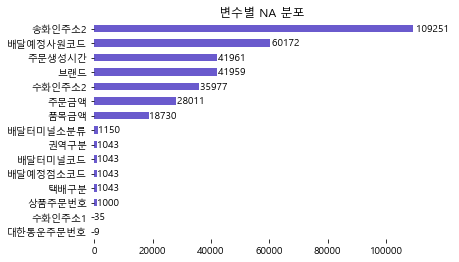

In [55]:
plt.rcParams['font.family'] = 'Malgun Gothic'

na = df.isnull().sum()
na = na[na > 0]
na.sort_values(inplace = True)

bar = na.plot(kind = 'barh', color = 'slateblue')
for p in bar.patches:
    x, y, width, height = p.get_bbox().bounds
    bar.text(width*1.01, y+height/2, "%d "%(width), va='center')
plt.title('변수별 NA 분포')
plt.box(False)

### 데이터 이상 감지

* 모든 주문유형 중 품목수량이 300개가 넘는 항목을 조회
* 고객사코드, 품목코드로 정렬한 결과 주문한 내역이 보이지 않는 품목코드 존재
* 조금씩 반품할 수도 있다는 것을 우려, 하지만 몇몇 품목코드의 데이터를 조회하면 반품한 이력만이 있는 것이 다수 존재 

In [56]:
pd.set_option('display.max_row', 400)

df[['고객사코드','품목코드','품목수량','주문유형']].loc[
    df.품목수량 > 300].sort_values(['고객사코드','품목코드'])


,고객사코드,품목코드,품목수량,주문유형
1588298,90001302,10302731,3000,8
1588299,90001302,10302752,1440,8
1588300,90001302,10302753,1440,8
1588301,90001302,10302754,1200,8
1588302,90001302,10302772,695,8
1588303,90001302,10302773,700,8
1588304,90001302,10302809,350,8
1588305,90001302,10302810,600,8
1588306,90001302,10302836,1520,8
1040858,90001302,10302854,2700,8


In [57]:
df[df.품목코드 == '116136']
#이렇듯 반품 이전에 구매이력이 존재x

,창고코드,고객주문번호(key),대한통운주문번호,주문유형,주문날짜시간,고객사코드,주문금액,품목순번,품목코드,브랜드,...,송화인주소2,수화인주소1,수화인주소2,weekdays,holidays,special,확진자 수,주문_월,주문_일,주문_시간
352278,KX007,9000144120210405,KX007210402818545,8,2021-04-05 16:35:37,90001441,NaN,2,116136,NaN,...,광주시,인천광역시,중구,0,0,1,473,4,5,16
387207,KX007,2021040671172971_C012,KX007210407888571,7,2021-04-07 15:14:38,90001441,NaN,1,116136,NaN,...,광주시,경기도,안양시,2,0,0,668,4,7,15
394757,KX007,2021040685545991_C174,KX007210408904228,7,2021-04-08 16:58:46,90001441,NaN,3,116136,NaN,...,광주시,인천광역시,동구,3,0,0,700,4,8,16
398578,KX007,2021040671307721_C077,KX007210408901473,7,2021-04-08 13:34:29,90001441,NaN,5,116136,NaN,...,광주시,강원도,고성군,3,0,0,700,4,8,13
401923,KX007,2021040686323591_C134,KX007210408901435,7,2021-04-08 15:10:56,90001441,NaN,3,116136,NaN,...,광주시,대구광역시,달서구,3,0,0,700,4,8,15
402005,KX007,2021040676902261_C145,KX007210408901475,7,2021-04-08 15:44:21,90001441,NaN,9,116136,NaN,...,광주시,대전광역시,유성구,3,0,0,700,4,8,15
402019,KX007,2021040684653881_C161,KX007210408901486,7,2021-04-08 16:17:02,90001441,NaN,7,116136,NaN,...,광주시,서울특별시,강남구,3,0,0,700,4,8,16
402074,KX007,2021040679235661_C109,KX007210408901540,7,2021-04-08 14:29:37,90001441,NaN,5,116136,NaN,...,광주시,광주광역시,광산구,3,0,0,700,4,8,14
402302,KX007,2021040678384181_C094,KX007210408901434,7,2021-04-08 13:56:00,90001441,NaN,5,116136,NaN,...,광주시,경기도,광주시,3,0,0,700,4,8,13
403590,KX007,2021040671369581_C262,KX007210409913116,7,2021-04-09 13:41:39,90001441,NaN,9,116136,NaN,...,광주시,경기도,용인시,4,0,0,671,4,9,13


## 창고코드별 품목수량 

<Figure size 1152x720 with 0 Axes>

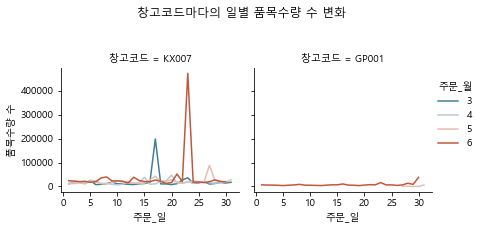

In [58]:
plt.figure(figsize = (16,10))
palette = sns.diverging_palette(220, 20, as_cmap=True)

wh_출고 = df.groupby(['주문_월', '주문_일','창고코드'])['품목수량'].sum().reset_index()

wh_plot = sns.relplot(data = wh_출고, x = '주문_일', y = '품목수량', hue = '주문_월', 
            col = '창고코드', col_wrap = 2, height = 3, kind = 'line',
                      palette = palette)

wh_plot.set_ylabels('품목수량 수')
wh_plot.set(xticks = range(0,32,5))
wh_plot.fig.suptitle('창고코드마다의 일별 품목수량 수 변화')
plt.subplots_adjust(top=0.7) #plot 높낮이


##### 군포 허브는 5월말부터 물품이 거쳐감
##### 6월달 말 전체 품목구매량이 급증한 이유는 군포 허브에서 발생한 것

##### 곤지암 HUB터미널 코드를 안다면 구분을 해주는 것이 좋을 것 같다.
##### 대부분이  곤지암에서 출고가 발생
##### 군포HUB는 6월 막날에 출고가 치솟았다. (6월 20일부터 군포도 메가허브로 지정되었기 떄문)
##### 군포HUB데이터로는 데이터가 부족하여 예측이  불가능이라 판단하기에 모델링에서 제외

## 주문유형이 출고인 데이터로 살펴보자!!!

In [50]:
df출고 = df[df.주문유형 == 7]
df출고 = df출고[df출고.창고코드 == 'KX007']
df출고.holidays = df출고.holidays.astype('str')
df출고 = df출고.sort_values('주문날짜시간')
df출고['date'] = pd.to_datetime(df출고['주문날짜시간']).dt.date
df출고.date = pd.to_datetime(df출고.date)
df출고['고객사코드'] = df출고['고객사코드'].astype(str)
df출고['holidays'] = df출고['holidays'].astype(int)


df출고['month'] = df출고.date.dt.month
df출고['month'] = df출고['month'].astype(int)
df출고['day_of_month'] = df출고.date.dt.day
df출고['day_of_month'] = df출고['day_of_month'].astype(int)


df출고.dropna(axis = 0, inplace = True)
df출고.columns

Index(['창고코드', '고객주문번호(key)', '대한통운주문번호', '주문유형', '주문날짜시간', '고객사코드', '주문금액',
       '품목순번', '품목코드', '브랜드', '품목수량', '품목금액', '수신여부', '주문생성시간', '택배구분',
       '상품주문번호', '중개업체주문번호', '접수여부', '배달예정점소코드', '배달예정사원코드', '배달터미널코드',
       '배달터미널소분류', '입력자ID', '입력일자시간', '권역구분', '분할여부', '송화인주소1', '송화인주소2',
       '수화인주소1', '수화인주소2', 'weekdays', 'holidays', 'special', '확진자 수 ', '주문_월',
       '주문_일', '주문_시간', 'date', 'month', 'day_of_month'],
      dtype='object')

In [51]:
print(f"total number of stores: {df출고['고객사코드'].nunique()}\n")
print(f"total number of items: {df출고['품목코드'].nunique()}\n")
print(f"total number of items per each store: {df출고.groupby(['고객사코드'])['품목코드'].nunique()}")

total number of stores: 14

total number of items: 13406

total number of items per each store: 고객사코드
90001302    5184
90001341    1080
90001381      63
90001441    2304
90001443    1781
90001521     369
90001541     429
90001542    1088
90001582    1302
90001602     922
90001622     969
90001662     146
90001682    2943
90001683      73
Name: 품목코드, dtype: int64


In [51]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df출고)

##################### Shape #####################
(1496520, 38)
##################### Types #####################
창고코드                    object
고객주문번호(key)             object
대한통운주문번호                object
주문유형                    object
주문날짜시간          datetime64[ns]
고객사코드                   object
주문금액                   float64
품목순번                     int64
품목코드                    object
브랜드                     object
품목수량                     int64
품목금액                   float64
수신여부                    object
주문생성시간          datetime64[ns]
택배구분                    object
상품주문번호                  object
중개업체주문번호                object
접수여부                    object
배달예정점소코드                object
배달예정사원코드                object
배달터미널코드                 object
배달터미널소분류                object
입력자ID                   object
입력일자시간          datetime64[ns]
권역구분                    object
분할여부                    object
송화인주소1                  object
송화인주소2                  object
수화인주소1            

## 월, 일, 시간에 따른 품목수량 

Text(0, 0.5, '품목수량')

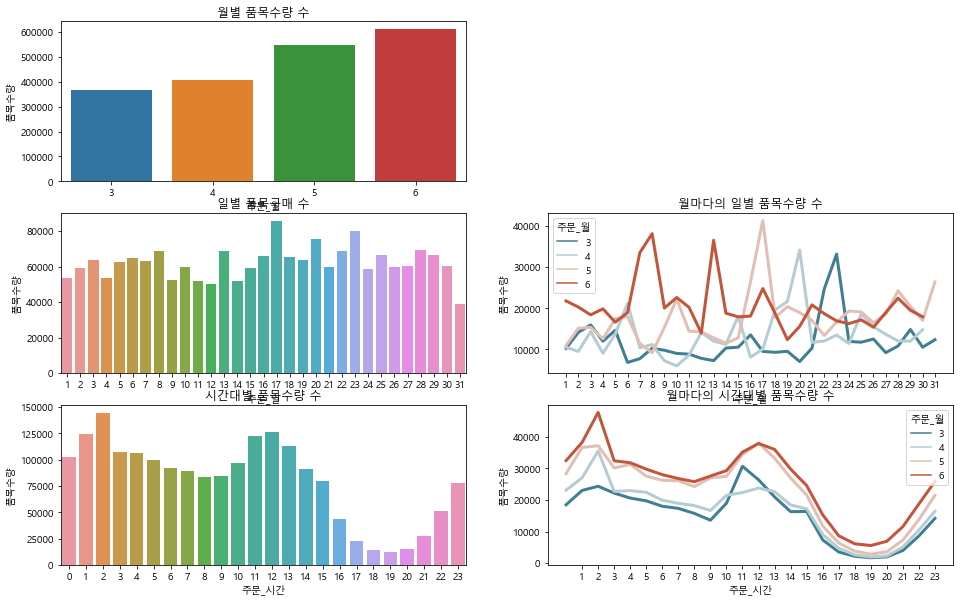

In [53]:
fig = plt.figure(figsize=[16,10])
palette = sns.diverging_palette(220, 20, as_cmap=True)
plt.rcParams['font.family'] = 'Malgun Gothic'


ax1 = fig.add_subplot(3,2,1)
ax1 = sns.barplot(x='주문_월',y='품목수량',data=df출고.groupby('주문_월')['품목수량'].sum().reset_index())
plt.title('월별 품목수량 수')
plt.ylabel('품목수량')


ax3 = fig.add_subplot(3,2,3)
ax3 = sns.barplot(x='주문_일',y= '품목수량' ,data=df출고.groupby('주문_일')['품목수량'].sum().reset_index())
plt.title('일별 품목구매 수')
plt.ylabel('품목수량')


ax4 = fig.add_subplot(3,2,4)
ax4 = sns.lineplot(x='주문_일',y='품목수량',data=df출고.groupby(['주문_월','주문_일'])['품목수량'].sum().reset_index(),
                  hue = '주문_월',
                  lw = 3,
                  palette = palette)
                  #style = '주문_월'
    
plt.title('월마다의 일별 품목수량 수')
plt.xticks(range(1,32,1))
plt.ylabel('품목수량')


ax5 = fig.add_subplot(3,2,5)
ax5 = sns.barplot(x='주문_시간',y='품목수량',data=df출고.groupby('주문_시간')['품목수량'].sum().reset_index())
plt.title('시간대별 품목수량 수')
plt.ylabel('품목수량')


ax6 = fig.add_subplot(3,2,6)
ax6 = sns.lineplot(x='주문_시간',y='품목수량',data=df출고.groupby(['주문_월','주문_시간'])['품목수량'].sum().reset_index(),
                  hue = '주문_월',
                  lw = 3,
                  palette = palette)
                  #style = '주문_월'
plt.title('월마다의 시간대별 품목수량 수')
plt.xticks(range(1,24,1))
plt.ylabel('품목수량')





* 월마다 품목구매수량 증가
* 월별로 특졍하게 많이 구매하는 일이 보임.
* 각 품목이 무엇인지 알 수는 없으나 각각 서로 다른 주기에 따라 구입이 되기에 월별로 치솟는 부분이 일정하지 않다고 판단
* 월별 주문 시간대는 거의 동일하다. (현 데이터의 이상치를 잘 잡기 위해 패턴이 좋은 시간은 변수로 활용 X)

## 월마다의 요일별 품목수량 

Text(0, 0.5, '품목수량 수')

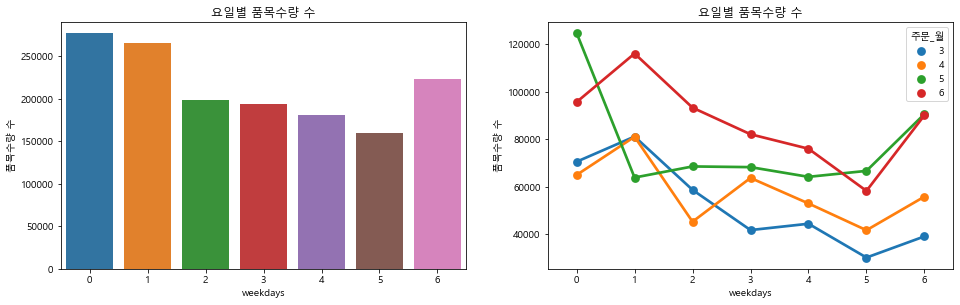

In [54]:
fig = plt.figure(figsize = (16,10))

week_p = df출고.groupby(['주문_월','weekdays'])['품목수량'].sum().reset_index()

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='weekdays',y='품목수량',data=df출고.groupby('weekdays')['품목수량'].count().reset_index())
plt.title('요일별 품목수량 수')
plt.ylabel('품목수량 수')



ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x = 'weekdays', y = '품목수량', 
                    data=df출고.groupby(['주문_월','weekdays'])['품목수량'].sum().reset_index(),
                        ci = None,
                        hue = '주문_월')

plt.title('요일별 품목수량 수')
plt.ylabel('품목수량 수')

* 보통 월,화가 품목구매수량이 많다.
* 월,화 및 주말의 품목구매수량 증감은 비슷한 경향을 띔.

## 평일과 휴일의 총 품목수량

Text(0, 0.5, '품목수량 수')

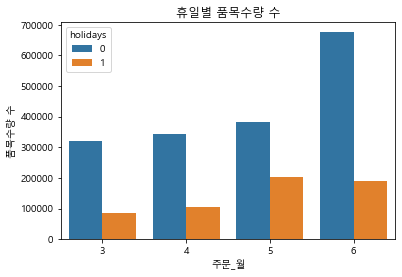

In [117]:
sns.barplot(x='주문_월',y= '품목수량' ,data=df출고.groupby(['주문_월','holidays'])['품목수량'].sum().reset_index(),
           hue = 'holidays')
plt.title('휴일별 품목수량 수')
plt.ylabel('품목수량 수')


## 고객사코드별 품목수량 

##### 90001302고객사코드에서 품목구매를 많이 한다.
##### 4월, 5월 혹은 6월부터 교류가 일어난 고객사코드가 존재한다.
##### 4월에 교류가 끊긴 고객사코드가 존재한다.

<Figure size 1440x1152 with 0 Axes>

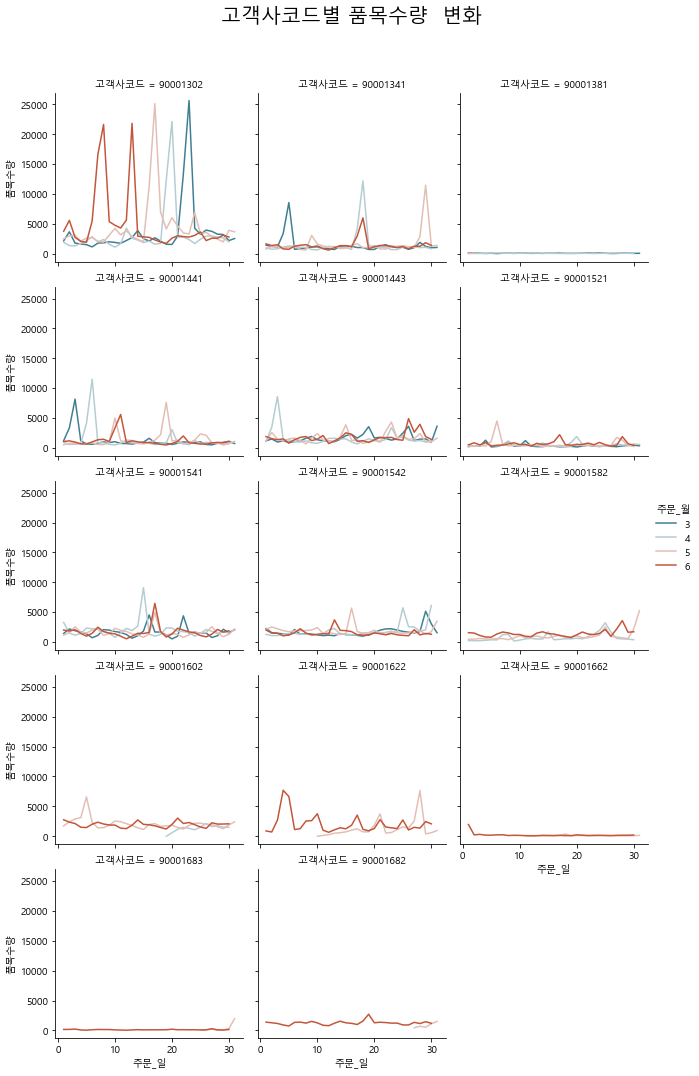

In [57]:
#고객사코드 개수와 품목구매 수의 관계를 알아보자.
figure = plt.figure(figsize = (20,16))
palette = sns.diverging_palette(220, 20, as_cmap=True)


df출고.고객사코드 = df출고.고객사코드.astype('str')
cus = df출고.groupby(['주문_월', '주문_일','고객사코드'])['품목수량'].sum().reset_index()

cus_plot = sns.relplot(data = cus, x = '주문_일', y = '품목수량', hue = '주문_월', 
            col = '고객사코드', col_wrap = 3, height = 3, kind = 'line',
                      palette = palette)


cus_plot.set_ylabels('품목수량')
cus_plot.fig.suptitle('고객사코드별 품목수량  변화', fontsize = 20)

plt.subplots_adjust(top=0.9) #plot 높낮이코드.value_counts()


In [403]:
cus_plot.savefig('image.png')

## 권역별 품목수량

<Figure size 1440x1152 with 0 Axes>

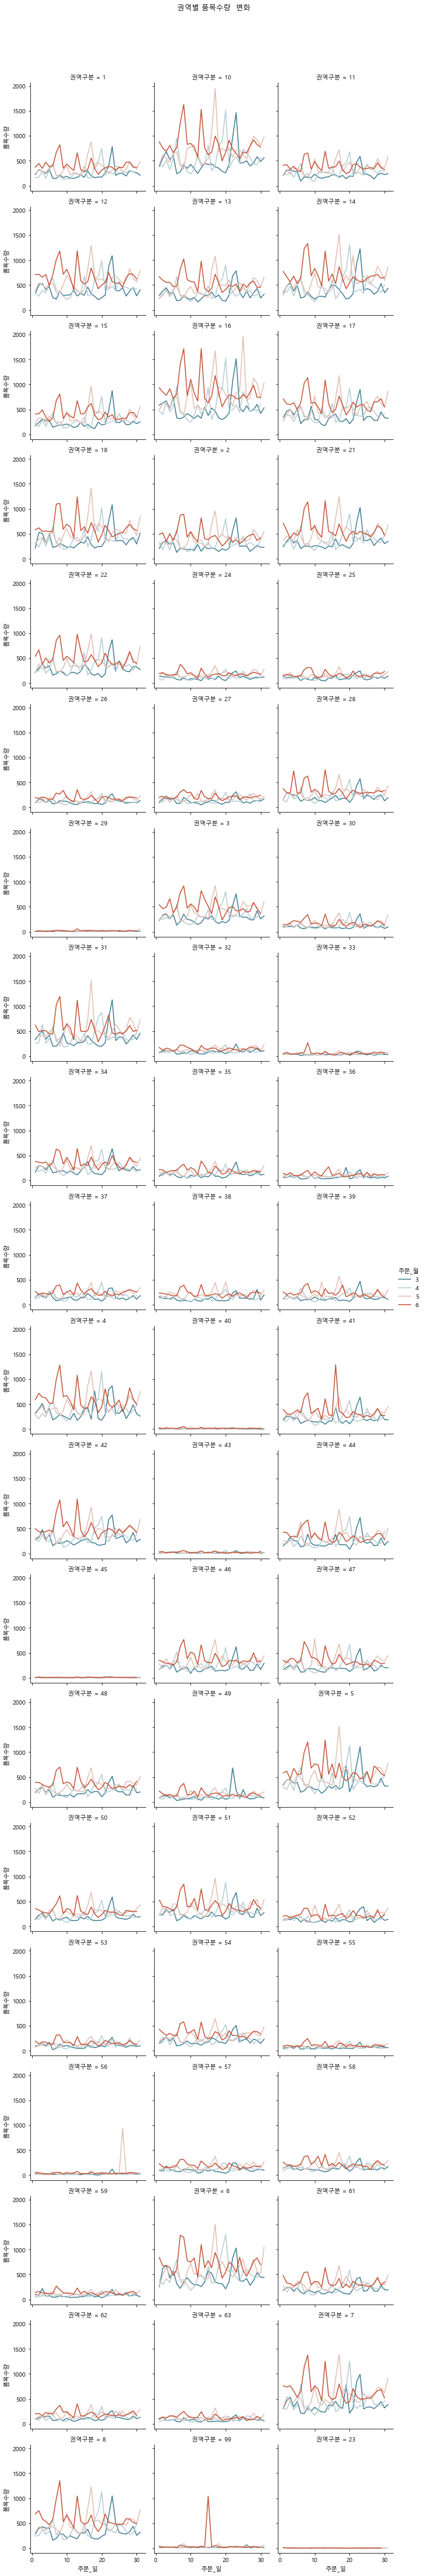

In [58]:
#권역과 품목구매량의 관계를 알아보자.
plt.figure(figsize = (20,16))
palette = sns.diverging_palette(220, 20, as_cmap=True)


df출고.고객사코드 = df출고.고객사코드.astype('str')
cus = df출고.groupby(['주문_월', '주문_일','권역구분'])['품목수량'].sum().reset_index()

cus_plot = sns.relplot(data = cus, x = '주문_일', y = '품목수량', hue = '주문_월', 
            col = '권역구분', col_wrap = 3, height = 3, kind = 'line',
                      palette = palette)


cus_plot.set_ylabels('품목수량')
cus_plot.fig.suptitle('권역별 품목수량  변화')
#아님 풀필먼트 변화..?
plt.subplots_adjust(top=0.95) #plot 높낮이코드.value_counts()


* 3,4,5,6월에 판매이력이 전부 있는 권역에선 대부분 비슷한 양상을 띔.
* 몇몇 권역에선 특정 시점에서만 주문량이 갑자기 높아진 것을 보임.
* 권역별로 주문량 차이가 어느정도 존재 (이후 통계적 검증을 통해 확신)

In [59]:
df출고

,창고코드,고객주문번호(key),대한통운주문번호,주문유형,주문날짜시간,고객사코드,주문금액,품목순번,품목코드,브랜드,...,weekdays,holidays,special,확진자 수,주문_월,주문_일,주문_시간,date,month,day_of_month
25786,KX007,2021030117872761,KX007210301297370,7,2021-03-01 00:01:29,90001443,23600.0,1,5161917826,조합형옵션상품,...,0,1,0,355,3,1,0,2021-03-01,3,1
25788,KX007,2021030117879091,KX007210301297313,7,2021-03-01 00:01:39,90001341,14900.0,1,598604962-4,조합형옵션상품,...,0,1,0,355,3,1,0,2021-03-01,3,1
25789,KX007,2021030117879531,KX007210301297390,7,2021-03-01 00:01:41,90001541,10900.0,1,4861386623_4,조합형옵션상품,...,0,1,0,355,3,1,0,2021-03-01,3,1
25787,KX007,2021030117878901,KX007210301297410,7,2021-03-01 00:01:49,90001542,210000.0,1,4884978039_1,조합형옵션상품,...,0,1,0,355,3,1,0,2021-03-01,3,1
25790,KX007,2021030117881601,KX007210301297411,7,2021-03-01 00:02:08,90001542,93800.0,1,4977419343_1,조합형옵션상품,...,0,1,0,355,3,1,0,2021-03-01,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759453,KX007,2021063088620231,KX007210701637659,7,2021-06-30 23:59:52,90001302,18900.0,1,5526911305_28,조합형옵션상품,...,2,0,0,794,6,30,23,2021-06-30,6,30
1759469,KX007,2021063088623851,KX007210701637768,7,2021-06-30 23:59:58,90001682,17800.0,2,5048285001,단일상품,...,2,0,0,794,6,30,23,2021-06-30,6,30
1759468,KX007,2021063088623851,KX007210701637768,7,2021-06-30 23:59:58,90001682,17800.0,1,5417720634,단일상품,...,2,0,0,794,6,30,23,2021-06-30,6,30
1759454,KX007,2021063088620411,KX007210701637660,7,2021-06-30 23:59:59,90001302,53500.0,1,575871584,단일상품,...,2,0,0,794,6,30,23,2021-06-30,6,30


In [1015]:
df출고.nunique()

창고코드                 2
고객주문번호(key)    1394670
대한통운주문번호       1398679
주문유형                 1
주문날짜시간         1226220
고객사코드                9
주문금액             10810
품목순번                38
품목코드             16413
브랜드                  3
품목수량               104
품목금액              3579
수신여부                 1
주문생성시간         1209079
택배구분                 1
상품주문번호         1764723
중개업체주문번호       1769011
접수여부                 1
배달예정점소코드          2074
배달예정사원코드          2430
배달터미널코드            348
배달터미널소분류           119
입력자ID               48
입력일자시간          134821
권역구분                60
분할여부                 2
송화인주소1              10
송화인주소2              15
수화인주소1              68
수화인주소2             345
weekdays             7
holidays             2
special              2
확진자 수              103
주문_월                 4
주문_일                31
주문_시간               24
date               122
dtype: int64

In [696]:
df출고

,창고코드,고객사코드,품목코드,품목수량,권역구분,weekdays,holidays,date,month,day_of_month
25786,KX007,90001443,5161917826,4,8.0,0,1,2021-03-01,3,1
25788,KX007,90001341,598604962-4,1,3.0,0,1,2021-03-01,3,1
25789,KX007,90001541,4861386623_4,1,41.0,0,1,2021-03-01,3,1
25787,KX007,90001542,4884978039_1,1,21.0,0,1,2021-03-01,3,1
25790,KX007,90001542,4977419343_1,1,3.0,0,1,2021-03-01,3,1
...,...,...,...,...,...,...,...,...,...,...
1759453,KX007,90001302,5526911305_28,1,21.0,2,0,2021-06-30,6,30
1759469,KX007,90001682,5048285001,1,21.0,2,0,2021-06-30,6,30
1759468,KX007,90001682,5417720634,1,21.0,2,0,2021-06-30,6,30
1759454,KX007,90001302,575871584,1,7.0,2,0,2021-06-30,6,30


In [60]:
df출고.to_csv('D:\\NIA\\선택과제\\2021년_미래기술_챌린지_211002\\1. 이커머스 FC주문 데이터\\df출고.csv',
         index = False, encoding = 'utf-8-sig')